In [34]:
import nltk
from nltk.tag import StanfordNERTagger
from nltk.metrics.scores import accuracy
nltk.download('draw')


raw_annotations = open("./text_analysis/eng.testa").read()
split_annotations = raw_annotations.split()

# Amend class annotations to reflect Stanford's NERTagger
for n,i in enumerate(split_annotations):
    if i == "I-PER":
        split_annotations[n] = "PERSON"
    if i == "I-ORG":
        split_annotations[n] = "ORGANIZATION"
    if i == "I-LOC":
        split_annotations[n] = "LOCATION"

# Group NE data into tuples
def group(lst, n):
    for i in range(0, len(lst), n):
        val = lst[i:i+n]
        if len(val) == n:
            yield tuple(val)

reference_annotations = list(group(split_annotations, 4))
pure_tokens = split_annotations[::4]
tagged_words = nltk.pos_tag(pure_tokens)
nltk_unformatted_prediction = nltk.ne_chunk(tagged_words)
for i in range(0, len(reference_annotations)):
    reference_annotations[i] = (reference_annotations[i][0], reference_annotations[i][3])
reference_annotations

[nltk_data] Error loading draw: Package 'draw' not found in index


[('-DOCSTART-', 'O'),
 ('CRICKET', 'O'),
 ('-', 'O'),
 ('LEICESTERSHIRE', 'ORGANIZATION'),
 ('TAKE', 'O'),
 ('OVER', 'O'),
 ('AT', 'O'),
 ('TOP', 'O'),
 ('AFTER', 'O'),
 ('INNINGS', 'O'),
 ('VICTORY', 'O'),
 ('.', 'O'),
 ('LONDON', 'LOCATION'),
 ('1996-08-30', 'O'),
 ('West', 'I-MISC'),
 ('Indian', 'I-MISC'),
 ('all-rounder', 'O'),
 ('Phil', 'PERSON'),
 ('Simmons', 'PERSON'),
 ('took', 'O'),
 ('four', 'O'),
 ('for', 'O'),
 ('38', 'O'),
 ('on', 'O'),
 ('Friday', 'O'),
 ('as', 'O'),
 ('Leicestershire', 'ORGANIZATION'),
 ('beat', 'O'),
 ('Somerset', 'ORGANIZATION'),
 ('by', 'O'),
 ('an', 'O'),
 ('innings', 'O'),
 ('and', 'O'),
 ('39', 'O'),
 ('runs', 'O'),
 ('in', 'O'),
 ('two', 'O'),
 ('days', 'O'),
 ('to', 'O'),
 ('take', 'O'),
 ('over', 'O'),
 ('at', 'O'),
 ('the', 'O'),
 ('head', 'O'),
 ('of', 'O'),
 ('the', 'O'),
 ('county', 'O'),
 ('championship', 'O'),
 ('.', 'O'),
 ('Their', 'O'),
 ('stay', 'O'),
 ('on', 'O'),
 ('top', 'O'),
 (',', 'O'),
 ('though', 'O'),
 (',', 'O'),
 ('may', 'O'

In [36]:
#Convert prediction to multiline string and then to list (includes pos tags)
multiline_string = nltk.chunk.tree2conllstr(nltk_unformatted_prediction)
listed_pos_and_ne = multiline_string.split()

# Delete pos tags and rename
del listed_pos_and_ne[1::3]
listed_ne = listed_pos_and_ne

# Amend class annotations for consistency with reference_annotations
for n,i in enumerate(listed_ne):
    if i == "B-PERSON":
        listed_ne[n] = "PERSON"
    if i == "I-PERSON":
        listed_ne[n] = "PERSON"    
    if i == "B-ORGANIZATION":
        listed_ne[n] = "ORGANIZATION"
    if i == "I-ORGANIZATION":
        listed_ne[n] = "ORGANIZATION"
    if i == "B-LOCATION":
        listed_ne[n] = "LOCATION"
    if i == "I-LOCATION":
        listed_ne[n] = "LOCATION"
    if i == "B-GPE":
        listed_ne[n] = "LOCATION"
if i == "I-GPE":
        listed_ne[n] = "LOCATION"

# Group prediction into tuples
nltk_formatted_prediction = list(group(listed_ne, 2))
nltk_formatted_prediction

[('-DOCSTART-', 'O'),
 ('CRICKET', 'ORGANIZATION'),
 ('-', 'O'),
 ('LEICESTERSHIRE', 'ORGANIZATION'),
 ('TAKE', 'O'),
 ('OVER', 'O'),
 ('AT', 'O'),
 ('TOP', 'ORGANIZATION'),
 ('AFTER', 'O'),
 ('INNINGS', 'ORGANIZATION'),
 ('VICTORY', 'O'),
 ('.', 'O'),
 ('LONDON', 'ORGANIZATION'),
 ('1996-08-30', 'O'),
 ('West', 'LOCATION'),
 ('Indian', 'LOCATION'),
 ('all-rounder', 'O'),
 ('Phil', 'PERSON'),
 ('Simmons', 'PERSON'),
 ('took', 'O'),
 ('four', 'O'),
 ('for', 'O'),
 ('38', 'O'),
 ('on', 'O'),
 ('Friday', 'O'),
 ('as', 'O'),
 ('Leicestershire', 'ORGANIZATION'),
 ('beat', 'O'),
 ('Somerset', 'O'),
 ('by', 'O'),
 ('an', 'O'),
 ('innings', 'O'),
 ('and', 'O'),
 ('39', 'O'),
 ('runs', 'O'),
 ('in', 'O'),
 ('two', 'O'),
 ('days', 'O'),
 ('to', 'O'),
 ('take', 'O'),
 ('over', 'O'),
 ('at', 'O'),
 ('the', 'O'),
 ('head', 'O'),
 ('of', 'O'),
 ('the', 'O'),
 ('county', 'O'),
 ('championship', 'O'),
 ('.', 'O'),
 ('Their', 'O'),
 ('stay', 'O'),
 ('on', 'O'),
 ('top', 'O'),
 (',', 'O'),
 ('though', '

In [37]:
nltk_accuracy = accuracy(reference_annotations, nltk_formatted_prediction)
print(nltk_accuracy)

0.910446314320059


In [38]:
nerfile = '../stanford-ner-2018-10-16/stanford-ner.jar'
modelfile = '../stanford-ner-2018-10-16/classifiers/english.all.3class.distsim.crf.ser.gz'

st = StanfordNERTagger(modelfile, nerfile, encoding='utf-8')                  
stanford_prediction = st.tag(pure_tokens)
stanford_accuracy = accuracy(reference_annotations, stanford_prediction)
print(stanford_accuracy)

0.9614370468029004


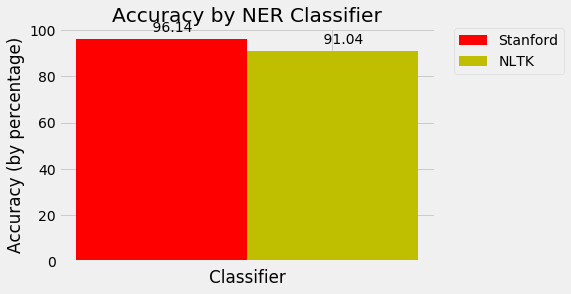

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('fivethirtyeight')

N = 1
ind = np.arange(N)  # the x locations for the groups
width = 0.35       # the width of the bars

fig, ax = plt.subplots()

stanford_percentage = stanford_accuracy * 100
rects1 = ax.bar(ind, stanford_percentage, width, color='r')

nltk_percentage = nltk_accuracy * 100
rects2 = ax.bar(ind+width, nltk_percentage, width, color='y')

# add some text for labels, title and axes ticks
ax.set_xlabel('Classifier')
ax.set_ylabel('Accuracy (by percentage)')
ax.set_title('Accuracy by NER Classifier')
ax.set_xticks(ind+width)
ax.set_xticklabels( ('') )

ax.legend( (rects1[0], rects2[0]), ('Stanford', 'NLTK'), bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0. )

def autolabel(rects):
    # attach some text labels
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x()+rect.get_width()/2., 1.02*height, '%10.2f' % float(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()